In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


# Implement SGD (Linear Regression) for Boston Housing Dataset.

#### Basic information about the dataset<br>

Number of data points: 506 
Creator: Harrison, D. and Rubinfeld, D.L.

#### Attribute Information:

Number of Attributes: 13 features, Missing Data: None
    
#### Objective:

The main aim of this experiment is to build a simple stochastic gradient descent algorithm from scratch and use it to apply linear regression to the boston dataset. We will find the best value of the co-efficients and use it to predict our final values. Also, we will compare our model to that of SKLearns built in SGD Regressor.

In [2]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from numpy.linalg import norm
import pandas as pd
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Import the boston dataset from sklearn
from sklearn.datasets import load_boston
boston = load_boston()

#Descriptive information about the boston dataset
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
#Get information about the shape of the boston dataset
print(boston.data.shape)

(506, 13)


In [5]:
#Get column names for the boston dataset
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
#Create a pandas dataframe for later use.
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
#Split the dataset into training and test set.
X_train, X_test, y_train, y_test = model_selection.train_test_split(boston.data, boston.target, test_size = 0.20, random_state = 5)

In [8]:
#Function used to column standardize any given matrix
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [9]:
print("Shape of the training data: ", X_train.shape)
print("Shape of the testing data: ", X_test.shape)

Shape of the training data:  (404, 13)
Shape of the testing data:  (102, 13)


## Task: Implement SGD for linear regression [M]

1. Implement your own version of sklearn SGDRegresser (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)
2. Plot a chart of predicted values Vs actual values of your own SGD Implementation
3. Now try out the SGDRegresser of sklearn and plot the chart of predicted values Vs actual values
4. In a tabular format, compare the weights obtained from your own implementation with the weights obtained after applying sklearn's SGDRegresser.
5. Also compare the MSE obtained from your custom implementation of SGDRegressor and that of sklearns implementation.
6. Try to get the weights & MSE of your custom implementation, similar to the weights and MSE of sklearns implementation.

In [10]:
#Make a new train dataframe containing X_train
train_df = pd.DataFrame(data = X_train, columns=boston.feature_names)
train_df['PRICE'] = list(y_train)

test_df = pd.DataFrame(data = X_test, columns=boston.feature_names)
test_df['PRICE'] = list(y_test)

train_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,-0.273810,-0.507766,-0.402012,-0.272888,-0.118484,-0.848834,0.963877,-0.022455,-0.636453,-0.583618,1.175619,-0.000302,0.835288,13.1
1,-0.404895,3.331365,-1.431888,3.664502,-1.314148,2.361809,-1.516597,0.999022,-0.981745,-1.231926,-2.202859,0.412907,-1.325495,50.0
2,8.073348,-0.507766,1.078157,-0.272888,1.112090,-0.478931,1.140549,-0.988813,1.665490,1.551633,0.810378,-3.849276,1.158196,8.8
3,-0.401406,-0.507766,0.161225,-0.272888,0.186977,-0.243407,0.317257,-0.752702,-0.981745,-0.785842,1.175619,0.428424,-0.483373,20.6
4,0.699954,-0.507766,1.078157,-0.272888,1.234274,0.166954,1.140549,-1.068474,1.665490,1.551633,0.810378,0.194665,1.114099,12.1


#### This code block contains all the common function we would need to proceed with this experiment.

In [12]:
#This function is used to implement SGD from scratch. What this function does is that it takes a bunch of inputs like training data, learning rate, learning rate type etc and performs stochastic gradient decent 
#with a sample size of 10 to obtain the best value of the linear coefficients w and b. Just like as in SGDRegressor() I have implemented 'invscaling' and 'constant' learning rate. In case of 'constant', 
#the learning rate won't change across all the epochs. In case of 'invscaling', the learning rate will be reduced by a factor lr_rate / pow(epoch, power_epoch), similar to the implementation present in the SGD 
#Regressor. There are two ways to initialize the initial weights. We can either set them to be zero, or make them equal to some very small values selected from a random normal distribution. The approach that I have
#followed is to set them to zero. The other one is commented out. You can follow the later if you want to. Just uncomment the code.
def sgd_optimize(X_train, y_train, lr_rate, lr_rate_variation, n_epochs, power_epoch):
    w_coeff=np.random.randn(13,1) #Randomly initalizing weights
    b_coeff=np.random.randn(1,1)  #Randomly picking up intercept value.
    
    for epoch in range(1,n_epochs+1):
        sum_errors = 0 #Sum of squared loss.
        N = X_train.shape[0] #The variable N in the SGD equation.

        for i in range(N):
            batch_size = np.random.randint(0,N)  # random batch size for every iteration i.e k batch_size
            X_i = X_train[batch_size,:].reshape(1,X_train.shape[1])
            y_i = y_train[batch_size].reshape(1,1)

            y_pred = np.dot(X_i,w_coeff) + b_coeff                  #y_curr = WT.X + B
            loss = y_pred - y_i                                     #w_grad = (-2/N)*(X)*(y-(WT.X+B)) = (-2/N)*(X) * loss 
            sum_errors += loss**2                                   #b_grad = (-2/N)*(y-(WT.X+B)) = (-2/N) * loss

            w_grad = X_i.T.dot((y_pred - y_i))
            b_grad = (y_pred - y_i)

            w_coeff = w_coeff -(2/N)*lr_rate*(w_grad)
            b_coeff = b_coeff - (2/N)*lr_rate*(b_grad)

        print("Epoch: %d, Loss: %.3f" %(epoch, sum_errors/N))

        if(lr_rate_variation=='invscaling'): #Implementing learning_rate 'invscaling' similar to that present in SGD Regressor.
            lr_rate = lr_rate / pow(epoch, power_epoch)
        else:
            pass

    return w_coeff, b_coeff

#This function is used to predict the class values given a test data.
def predict(X_test, w_coeff, b_coeff):
    X_test=np.array(X_test)
    y_pred =[]
    for i in range(0,len(X_test)):
        y=np.asscalar(np.dot(w_coeff,X_test[i]) + b_coeff) #Convert an array of size 1 to its scalar equivalent.
        y_pred.append(y)
    return np.array(y_pred)

#This function is used to compare the distribution of the actual values and predicted values.
#This will give us a generic idea if or not the predicted and actual values are close to each other.
def plot_distribution(y_test,y_pred):
    import seaborn as sns
    dataset=pd.DataFrame(y_test,columns=['Actual_Y'])
    dataset['Predcited_Y']=y_pred
    plt.figure(figsize=(12,12))
    sns.distplot(y_test, label = "Actual Y", color = 'red')
    sns.distplot(y_pred, label = "Predcited Y" , color = 'blue' )
    plt.legend()
    plt.show()
    
#This function is used to plot the scatter plot between actual and predicted y.
def plot_scatter(y_test,y_pred):
    plt.scatter(y_test,y_pred)
    plt.title('Scatter plot between Actual and Predicted Y.')
    plt.xlabel('Actual Y')
    plt.ylabel('Predicted Y')
    plt.grid(b=True, linewidth=0.5)
    plt.show()

    #Get the mean squared error between the predicted and the actual values.   
    mse=mean_squared_error(y_test,y_pred)
    print('Mean Squared Error between Actual and Predicted values: ',mse)
    return mse

#Plot a chart of predicted values Vs actual values.    
def plot_chart(y_test,y_pred):
    data=[y_test,y_pred]
    labels=["Actual Y","Predicted Y"]
    x_axes = np.arange(0,len(list(y_test)))
    color_map = ['red','blue']
    plt.figure(figsize=(30,5))
    for index in range(0,len(data)):
        plt.plot(x_axes, data[index], color=color_map[index], label=labels[index])
    plt.xlabel('Data Points')
    plt.ylabel('Class Values')
    plt.title("Comparison between the predicted and actual values.")
    plt.legend()
    plt.show()

#### Implement SGD with constant learning rate over 5000 iterations, lr_rate_variation='constant'

In [13]:
#Get the optimal value of the w coefficients and b coefficients.
w_coeff_optimal, b_coeff_optimal = sgd_optimize(X_train, y_train, lr_rate=0.01, lr_rate_variation='constant', n_epochs=500, power_epoch=None)
weights_df = pd.DataFrame(w_coeff_optimal, columns=["SGD + Constant LR"])

Epoch: 1, Loss: 632.434
Epoch: 2, Loss: 601.952
Epoch: 3, Loss: 563.064
Epoch: 4, Loss: 547.673
Epoch: 5, Loss: 588.744
Epoch: 6, Loss: 504.048
Epoch: 7, Loss: 499.900
Epoch: 8, Loss: 456.105
Epoch: 9, Loss: 433.709
Epoch: 10, Loss: 423.763
Epoch: 11, Loss: 397.819
Epoch: 12, Loss: 377.030
Epoch: 13, Loss: 371.924
Epoch: 14, Loss: 360.128
Epoch: 15, Loss: 334.781
Epoch: 16, Loss: 323.897
Epoch: 17, Loss: 338.296
Epoch: 18, Loss: 317.829
Epoch: 19, Loss: 301.766
Epoch: 20, Loss: 300.700
Epoch: 21, Loss: 270.994
Epoch: 22, Loss: 244.480
Epoch: 23, Loss: 261.091
Epoch: 24, Loss: 237.649
Epoch: 25, Loss: 227.010
Epoch: 26, Loss: 223.037
Epoch: 27, Loss: 244.091
Epoch: 28, Loss: 228.318
Epoch: 29, Loss: 193.418
Epoch: 30, Loss: 195.573
Epoch: 31, Loss: 196.789
Epoch: 32, Loss: 182.308
Epoch: 33, Loss: 192.512
Epoch: 34, Loss: 172.121
Epoch: 35, Loss: 179.720
Epoch: 36, Loss: 158.391
Epoch: 37, Loss: 147.112
Epoch: 38, Loss: 137.329
Epoch: 39, Loss: 155.442
Epoch: 40, Loss: 135.423
Epoch: 41

Epoch: 348, Loss: 29.009
Epoch: 349, Loss: 25.836
Epoch: 350, Loss: 18.852
Epoch: 351, Loss: 19.705
Epoch: 352, Loss: 30.833
Epoch: 353, Loss: 25.107
Epoch: 354, Loss: 23.227
Epoch: 355, Loss: 28.911
Epoch: 356, Loss: 19.490
Epoch: 357, Loss: 21.934
Epoch: 358, Loss: 22.911
Epoch: 359, Loss: 22.481
Epoch: 360, Loss: 21.246
Epoch: 361, Loss: 27.041
Epoch: 362, Loss: 21.874
Epoch: 363, Loss: 20.866
Epoch: 364, Loss: 30.682
Epoch: 365, Loss: 23.141
Epoch: 366, Loss: 24.000
Epoch: 367, Loss: 21.899
Epoch: 368, Loss: 20.517
Epoch: 369, Loss: 20.994
Epoch: 370, Loss: 22.432
Epoch: 371, Loss: 23.381
Epoch: 372, Loss: 23.941
Epoch: 373, Loss: 22.373
Epoch: 374, Loss: 20.594
Epoch: 375, Loss: 21.880
Epoch: 376, Loss: 19.316
Epoch: 377, Loss: 21.398
Epoch: 378, Loss: 23.902
Epoch: 379, Loss: 22.371
Epoch: 380, Loss: 23.558
Epoch: 381, Loss: 23.295
Epoch: 382, Loss: 20.734
Epoch: 383, Loss: 18.086
Epoch: 384, Loss: 25.532
Epoch: 385, Loss: 22.004
Epoch: 386, Loss: 21.815
Epoch: 387, Loss: 25.610


We can see that that the Loss value keeps on deceasing to the last as the number of Epochs increases.

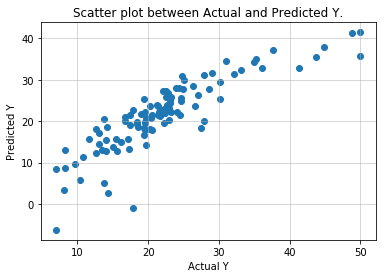

Mean Squared Error between Actual and Predicted values:  21.050684314238026


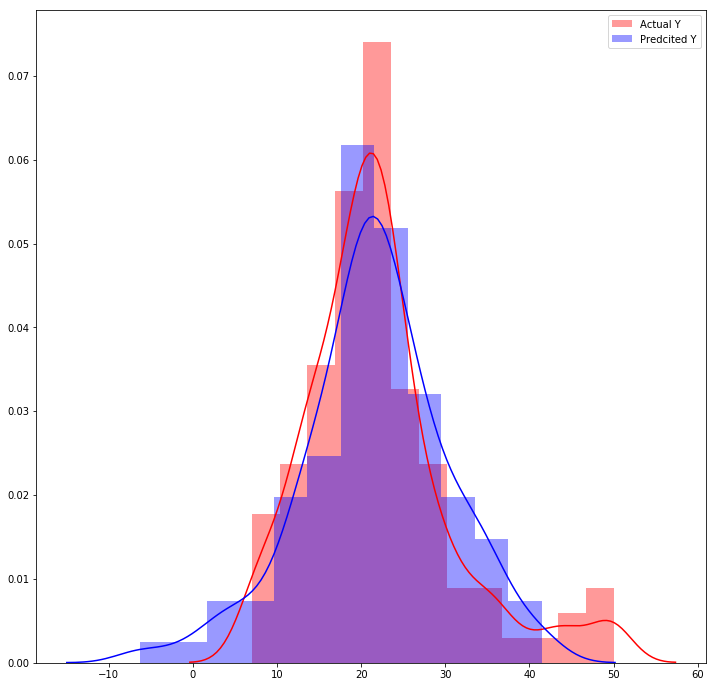

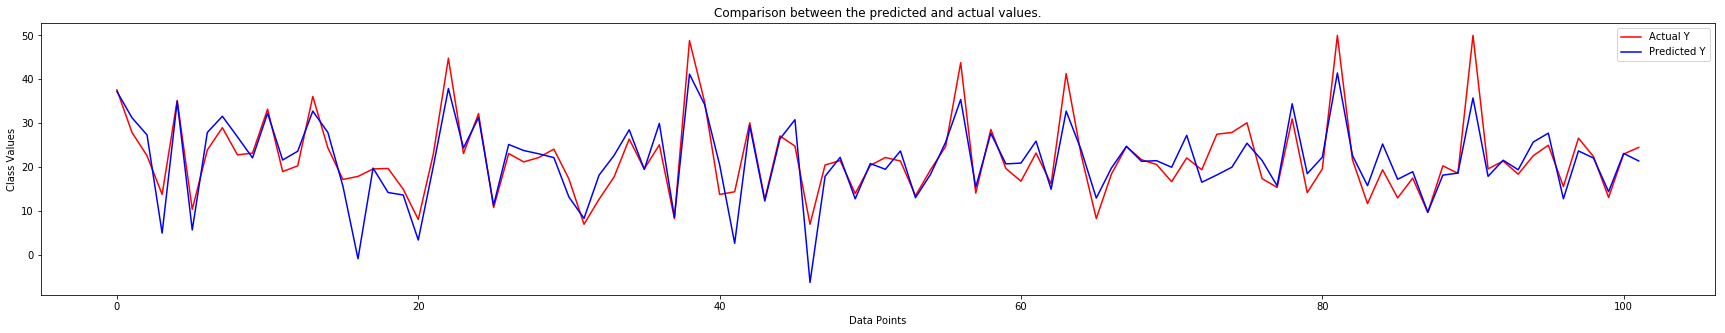

In [14]:
#Predict the class labels of the test set using the optimal values obtained from the previous step.
y_pred = predict(X_test, w_coeff_optimal.T, b_coeff_optimal)

#Draw the scatter plot
mse1=plot_scatter(y_test,y_pred)

#Plot the distribution of the actual and predicted values.
plot_distribution(y_test,y_pred)

#Plot a chart of predicted values Vs actual values.
plot_chart(y_test,y_pred)

We can see above that the distribution of both the actual as well as the predicted values are nearly the same with somre fluctuations. The line chart also shows that! The predicted and actual values are not that far away from each other. This shows our custom implementation is not too bad by any means! Let's apply 'invscallin' learning rate and see if we are able to get something better than this. 

#### Implement SGD with variable learning rate over 5000 iterations, lr_rate_variation='invscaling'

In [15]:
#Get the optimal value of the w coefficients and b coefficients.
w_coeff_optimal, b_coeff_optimal = sgd_optimize(X_train, y_train, lr_rate=1, lr_rate_variation='invscaling', n_epochs=500, power_epoch=0.25)
weights_df["SGD + Variable LR"] = pd.DataFrame(w_coeff_optimal)

Epoch: 1, Loss: 157.458
Epoch: 2, Loss: 23.737
Epoch: 3, Loss: 24.154
Epoch: 4, Loss: 24.412
Epoch: 5, Loss: 19.737
Epoch: 6, Loss: 18.713
Epoch: 7, Loss: 28.784
Epoch: 8, Loss: 21.161
Epoch: 9, Loss: 20.589
Epoch: 10, Loss: 19.832
Epoch: 11, Loss: 22.831
Epoch: 12, Loss: 21.951
Epoch: 13, Loss: 16.512
Epoch: 14, Loss: 23.550
Epoch: 15, Loss: 20.269
Epoch: 16, Loss: 31.322
Epoch: 17, Loss: 23.420
Epoch: 18, Loss: 21.428
Epoch: 19, Loss: 24.121
Epoch: 20, Loss: 17.080
Epoch: 21, Loss: 25.537
Epoch: 22, Loss: 24.843
Epoch: 23, Loss: 22.623
Epoch: 24, Loss: 20.724
Epoch: 25, Loss: 21.636
Epoch: 26, Loss: 23.077
Epoch: 27, Loss: 28.056
Epoch: 28, Loss: 23.101
Epoch: 29, Loss: 23.213
Epoch: 30, Loss: 22.037
Epoch: 31, Loss: 21.718
Epoch: 32, Loss: 16.611
Epoch: 33, Loss: 22.359
Epoch: 34, Loss: 20.699
Epoch: 35, Loss: 19.758
Epoch: 36, Loss: 20.697
Epoch: 37, Loss: 26.994
Epoch: 38, Loss: 20.061
Epoch: 39, Loss: 21.164
Epoch: 40, Loss: 28.402
Epoch: 41, Loss: 22.248
Epoch: 42, Loss: 27.651


Epoch: 344, Loss: 20.131
Epoch: 345, Loss: 23.228
Epoch: 346, Loss: 22.536
Epoch: 347, Loss: 25.264
Epoch: 348, Loss: 21.795
Epoch: 349, Loss: 29.466
Epoch: 350, Loss: 20.575
Epoch: 351, Loss: 16.565
Epoch: 352, Loss: 24.702
Epoch: 353, Loss: 24.768
Epoch: 354, Loss: 23.003
Epoch: 355, Loss: 19.405
Epoch: 356, Loss: 16.517
Epoch: 357, Loss: 30.336
Epoch: 358, Loss: 21.522
Epoch: 359, Loss: 25.669
Epoch: 360, Loss: 18.532
Epoch: 361, Loss: 24.862
Epoch: 362, Loss: 25.705
Epoch: 363, Loss: 26.991
Epoch: 364, Loss: 28.459
Epoch: 365, Loss: 22.872
Epoch: 366, Loss: 22.152
Epoch: 367, Loss: 22.833
Epoch: 368, Loss: 24.571
Epoch: 369, Loss: 21.301
Epoch: 370, Loss: 21.537
Epoch: 371, Loss: 17.097
Epoch: 372, Loss: 31.330
Epoch: 373, Loss: 28.513
Epoch: 374, Loss: 19.283
Epoch: 375, Loss: 21.577
Epoch: 376, Loss: 23.099
Epoch: 377, Loss: 31.272
Epoch: 378, Loss: 18.298
Epoch: 379, Loss: 19.531
Epoch: 380, Loss: 21.704
Epoch: 381, Loss: 21.029
Epoch: 382, Loss: 22.788
Epoch: 383, Loss: 29.609


We can see that that the Loss value keeps on deceasing to the last as the number of Epochs increases.

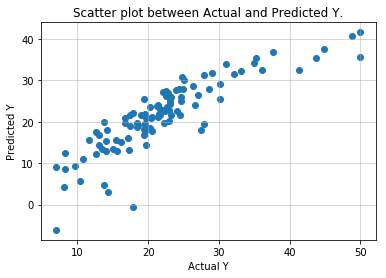

Mean Squared Error between Actual and Predicted values:  20.68148078658784


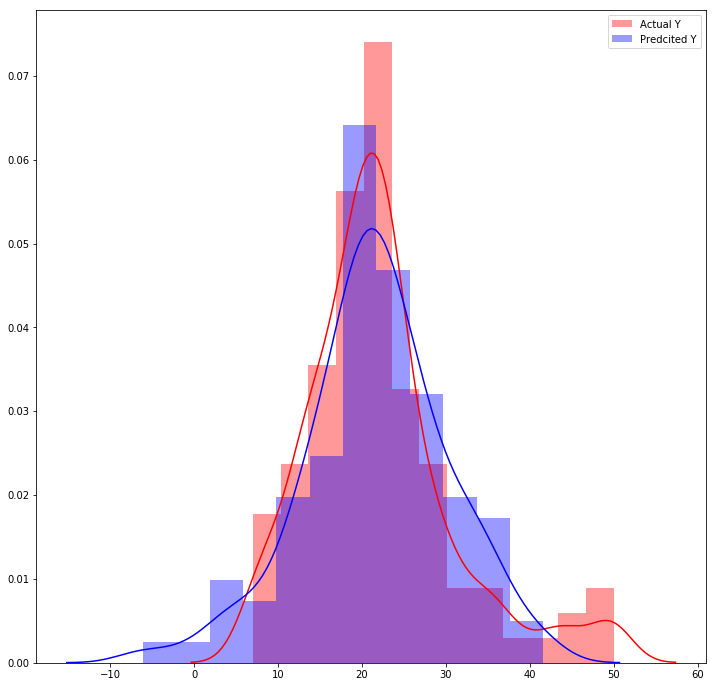

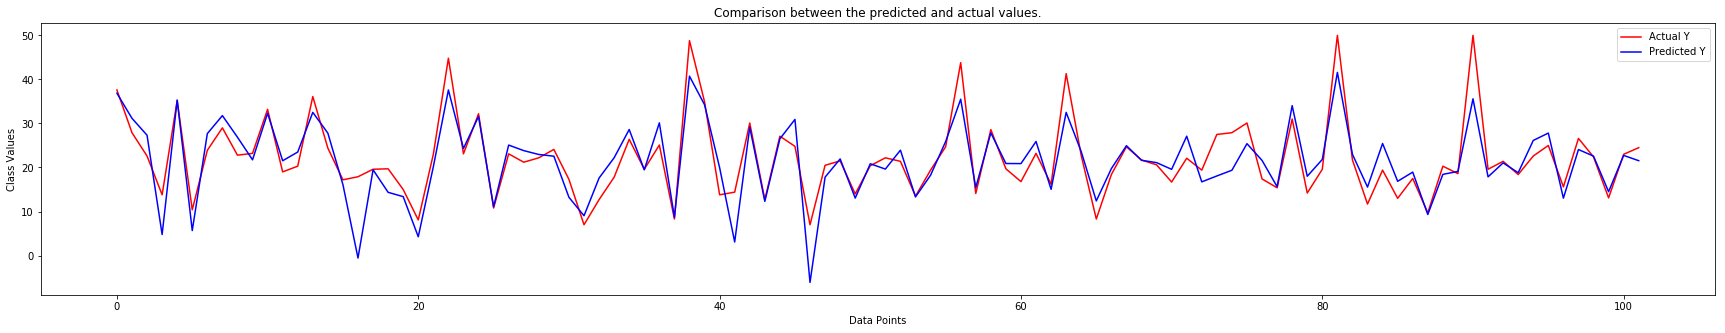

In [16]:
#Predict the class labels of the test set using the optimal values obtained from the previous step.
y_pred = predict(X_test, w_coeff_optimal.T, b_coeff_optimal)

#Draw the scatter plot
mse2=plot_scatter(y_test,y_pred)

#Plot the distribution of the actual and predicted values.
plot_distribution(y_test,y_pred)

#Plot a chart of predicted values Vs actual values.
plot_chart(y_test,y_pred)

Here again we see that the distribution of both the actual as well as the predicted values are nearly the same with somre fluctuations. The line chart also shows that! The predicted and actual values are not that far away from each other. This shows our custom implementation with 'invscallin' is better than 'constant' learning rate implementation. We have also been able to achive a lower MSE score of 555 as compared to 560 of the previous model, which is pretty decent.

#### Implement sklearns SGD Regressor with variable learning rate over 5000 iterations, lr_rate_variation='invscaling'

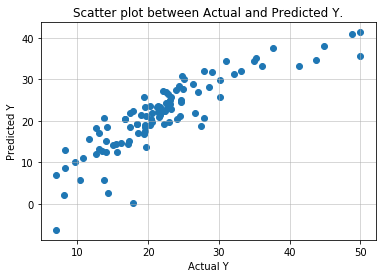

Mean Squared Error between Actual and Predicted values:  20.883988186134854


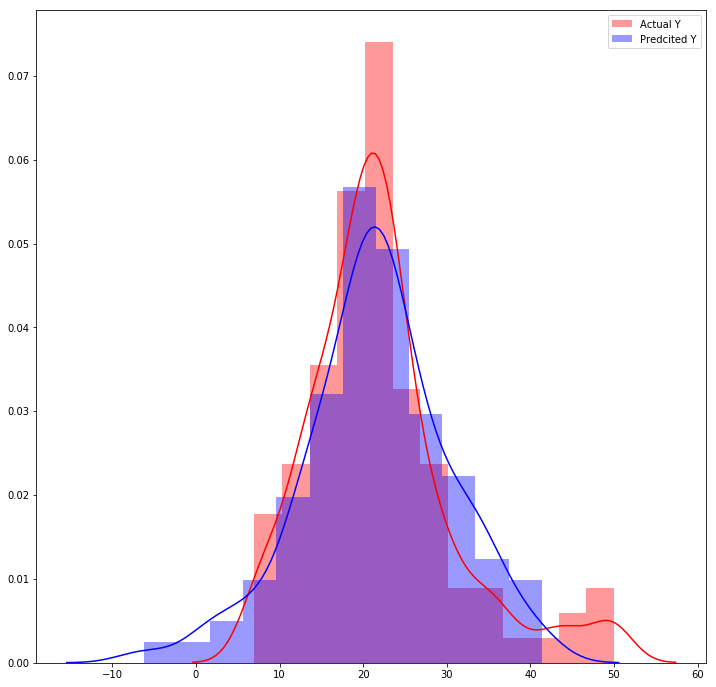

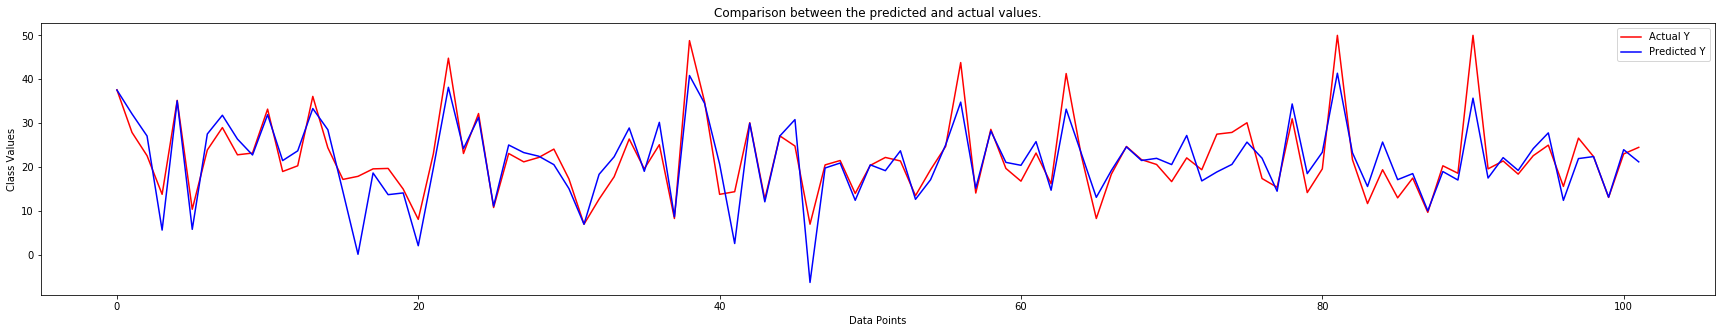

In [17]:
from sklearn.linear_model import SGDRegressor
import warnings
warnings.filterwarnings("ignore")

#Fit the SGDRegressor() model to the training data and Predict the class labels of the test data.
model = SGDRegressor(loss='squared_loss', alpha=0.0001, random_state=0, learning_rate='invscaling', eta0=0.001, power_t=0.25, max_iter=5000) #eta0 is learning rate in my implementation.
model.fit(X_train, y_train) 
y_pred=model.predict(X_test)    

weights_df["SKLEARN SGD Regressor"] = pd.DataFrame(model.coef_)

#Draw the scatter plot
mse3=plot_scatter(y_test,y_pred)

#Plot the distribution of the actual and predicted values.
plot_distribution(y_test,y_pred)

#Plot a chart of predicted values Vs actual values.
plot_chart(y_test,y_pred)

Here again we see that the distribution of both the actual as well as the predicted values are nearly the same with some fluctuations. The line chart also shows that! The predicted and actual values are not that far away from each other. Here we have got a MSE of 558. This is actually very near to that obtained in case of custom implemenation of SGD. In fact, the custom models with 'invscalling' learning rate MSE is better! 555 as compared to 558 of this one.

#### Implement sklearns LinearRegression.

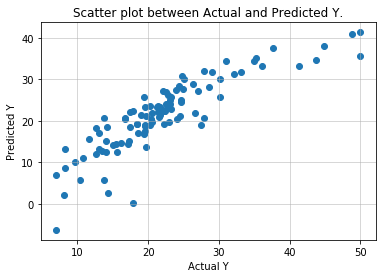

Mean Squared Error between Actual and Predicted values:  20.90284368037242


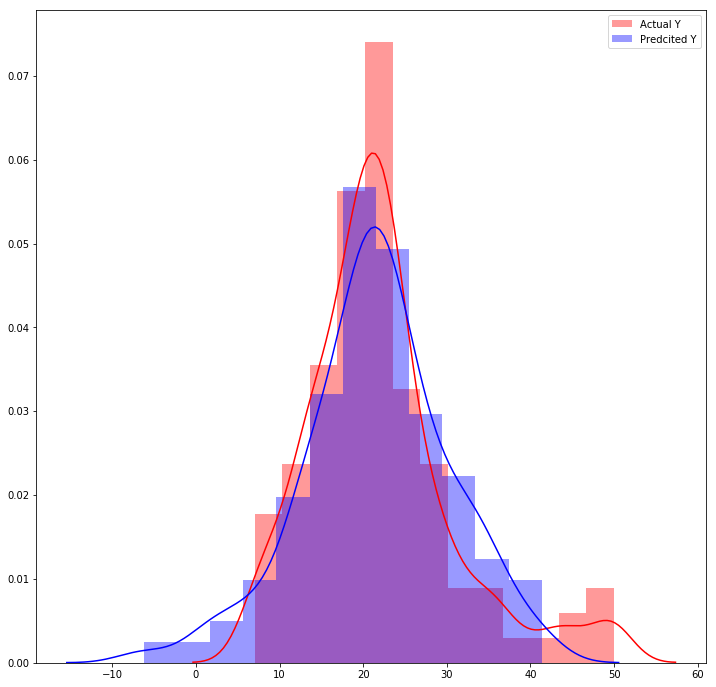

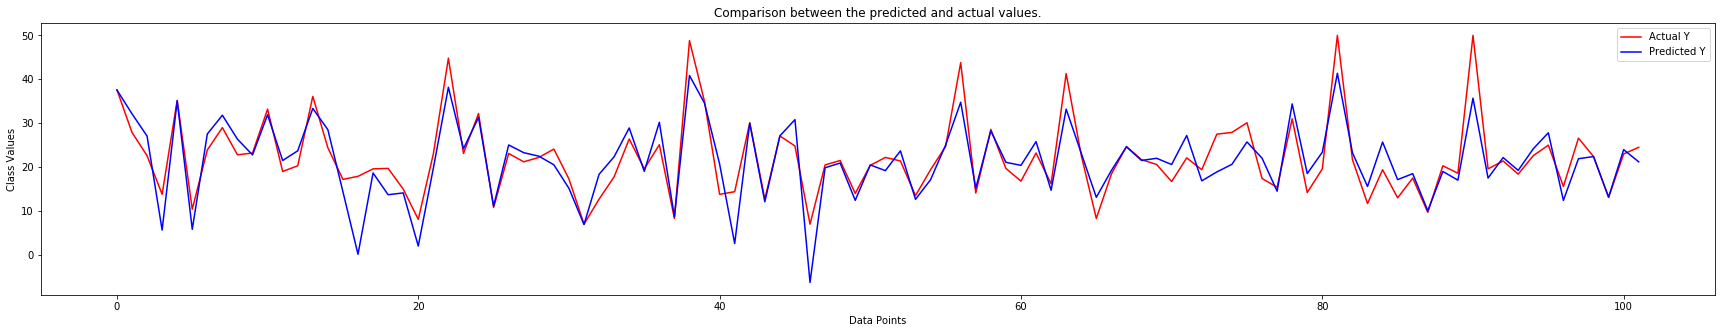

In [18]:
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

#Fit the LinearRegression() model to the training data and Predict the class labels of the test data.
model = LinearRegression()
model.fit(X_train , y_train ) 
y_pred=model.predict(X_test)

weights_df["SKLEARN Linear Regressor"] = pd.DataFrame(model.coef_.T)

#Draw the scatter plot
mse4=plot_scatter(y_test ,y_pred)

#Plot the distribution of the actual and predicted values.
plot_distribution(y_test ,y_pred)

#Plot a chart of predicted values Vs actual values.
plot_chart(y_test ,y_pred)

Here we observe the same thing. The distributions are almost overlapping and the MSE obtained is 558. 

### Comparing model weights.

In [19]:
#Lets compare the weights obtained from all 4 experiments performed above
weights_df.head(15)

,SGD + Constant LR,SGD + Variable LR,SKLEARN SGD Regressor,SKLEARN Linear Regressor
0,-1.020145,-1.038664,-1.127522,-1.129871
1,0.914355,0.868491,1.152306,1.157463
2,-0.579347,-0.576878,-0.004502,0.010275
3,0.717780,0.813672,0.689744,0.687653
4,-0.999673,-1.094099,-1.831669,-1.834146
5,2.509774,2.539116,2.360744,2.358181
6,-0.172654,-0.283854,0.031240,0.033491
7,-2.683529,-2.615562,-3.067652,-3.067826
8,1.863295,1.472158,3.124452,3.164860
9,-1.019091,-0.761762,-2.168325,-2.213398


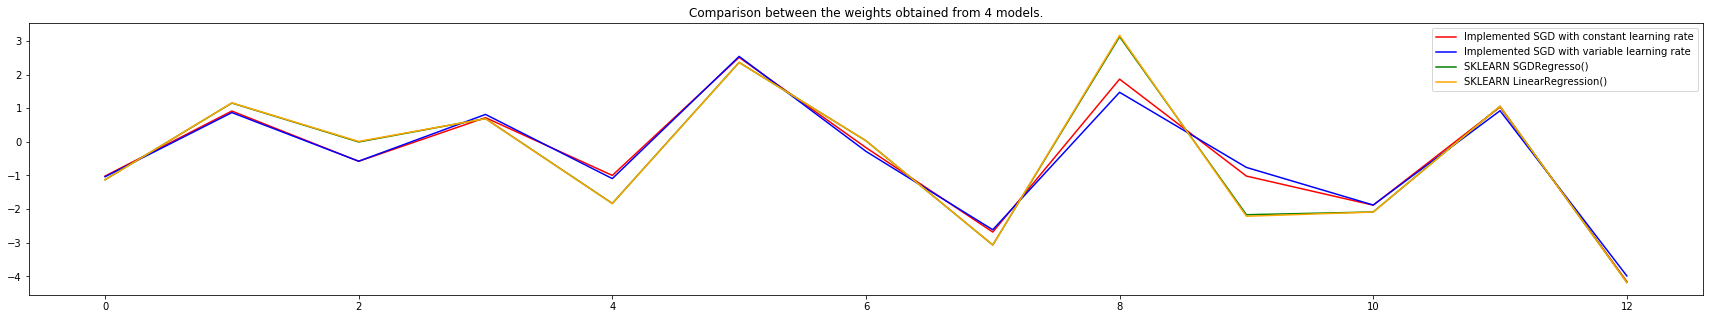

In [20]:
#Let's plot a line chart for all the weights obtained above to see how close they are in a 2D space.
a=list(weights_df['SGD + Constant LR'])
b=list(weights_df['SGD + Variable LR'])
c=list(weights_df['SKLEARN SGD Regressor'])
d=list(weights_df['SKLEARN Linear Regressor'])
data=[a,b,c,d]
labels=["Implemented SGD with constant learning rate","Implemented SGD with variable learning rate","SKLEARN SGDRegresso()","SKLEARN LinearRegression()"]
x_axes = np.arange(0,len(list(a)))
color_map = ['red','blue','green','orange']
plt.figure(figsize=(30,5))
for index in range(0,len(data)):
    plt.plot(x_axes, data[index], color=color_map[index], label=labels[index])
plt.title("Comparison between the weights obtained from 4 models.")
plt.legend()
plt.show()

In [21]:
#Display the Mean Squared Error gor all the 4 models.
print("MSE, Custom SGD + Constant Learning Rate: ",mse1)
print("MSE, Custom SGD + Variable Learning Rate: ",mse2)
print("MSE, Sklerns SGD Regressor :              ",mse3)
print("MSE, Sklerns Linear Regressor :           ",mse4)

MSE, Custom SGD + Constant Learning Rate:  21.050684314238026
MSE, Custom SGD + Variable Learning Rate:  20.68148078658784
MSE, Sklerns SGD Regressor :               20.883988186134854
MSE, Sklerns Linear Regressor :            20.90284368037242


### Final Conclusion:
As we can see above, that the weights obtained from SKLEARN's SGDRegressor() and LinearRegression() are almost exactly the same. They are completely inseperable from the graph obtained above (denoted by the green and orange line respectively. The weights obtained by the custom implmentation of the SGD algorithm are denoted by red and blue lines. As we can see they are not very away from SKLEARN's implementation. There are ofcourse some differences between the custom implementation than that of SKLEARN's. However, in general, the custom implemented SGD has been able to come very close to the actual weights. The custom SGD has been able to capture the deacresing and increasing patterns in the weight vectors. If you notice carefully, you will see that in every block of width of 1 units across X axis, wherever there is a fall/increase in the value of the actual weights, there has been a corresponding fall/increase in the values of the wights we have obtained from our custom implementation. Also if you notice all the indivdual distributions and scatter plots of the predicted and actual values of Y, you will find all four of them to have similar distributions over space. For all for of them you can see that the distribution has a mean of 0 and a variance of roughly 3 on either side of the origin. 

Infact, as far as MSE is concerned our custom implementation of the SGD algorithm with variable learning rate has been able to achieve a lower MSE (20.68) as compared to that of Sklearns (20.88 and 20.90).   